# Graph Analysis Script
This script will contain the following analyses:
* Spectral Graph Partitioning
* Node Degree Centrality Analysis
* Hierarchy Index Calculation
* Rich Club Coefficient Calculation
* Triangulative Potential Analysis

## Creating the required environment (skip if already done)

Running the following cell will create a file graphs.yml that can be used to setup a conda environment containing the required packages. If you already downloaded the file from my GitHub, skip the next cell and create the env directly from it.

In [ ]:
%%writefile graphs.yml
name: graphs
channels:
  - conda-forge
  - defaults
dependencies:
  - python=3.6
  - jupyter
  - imageio
  - imageio-ffmpeg
  - matplotlib
  - scikit-image
  - opencv
  - networkx
  - pandas
  - statsmodels

### Environment Creation
To create the environment, open the terminal, go to the directory where you stored the graphs.yml file (the directory of the notebook) and type
conda env create -f graphs.yml
After running this command you have to activate the environment (Linux/MacOS: conda activate graphs, Windows: activate graphs) and then reopen the notebook in that environment.

In [171]:
import os
import cv2
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import glob
import scipy.cluster.vq as clusters
import scipy.sparse as sparse
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.special import binom as nchoosek
from sklearn.preprocessing import normalize
from pandas.plotting import autocorrelation_plot as AC_plot 
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from skimage.filters import gaussian
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LinearSegmentedColormap


OG_DATA_PATH = './'
GIT_DATA_PATH = './Data Exploration/'
GIT_PROCESSED_DATA_PATH = './Results/'
GIT_GRAPH_PATH = './Results/Graphs/'
RESSOURCES_PATH = './Ressources/'

# Reset the Datapath since the data is not yet on Git, comment out if data is on Git 
DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Data Exploration/'

PROCESSED_DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Results/'
GRAPH_DATA_PATH = '/Volumes/EXTENSION/Uni/Study Project/Results/Graphs/'
# Getting the Folder without hidden files in ascending order 
DATA_FOLDER = sorted([f for f in os.listdir(DATA_PATH) if not f.startswith('.')], key=str.lower)
PROCESSED_DATA_FOLDER = sorted([f for f in os.listdir(PROCESSED_DATA_PATH) if not f.startswith('.')], key=str.lower)
GIT_PROCESSED_DATA_FOLDER = sorted([f for f in os.listdir(GIT_PROCESSED_DATA_PATH) if not f.startswith('.')], key=str.lower)
GIT_GRAPH_FOLDER = sorted([f for f in os.listdir(GIT_GRAPH_PATH) if not f.startswith('.')], key=str.lower)

#houselist 
house_file = RESSOURCES_PATH + 'building_collider_list.csv'
try:
    houselist = pd.read_csv(house_file)
except:
    print('HouseList could not be loaded!')
    
    
fontsize = 20

green = [0.40,0.80,0.42]
blue = [0.27,0.38,0.99]

### Extracting all subject IDs from the data folder

In [2]:
subIDs = []
for sub in DATA_FOLDER:
    if sub[0].isdigit():
        subIDs.append(int(sub[0:4]))
    else:
        pass
subIDs = np.unique(subIDs)
print(subIDs)

[1005 1008 1010 1011 1013 1017 1018 1019 1021 1023 1079 1080]


In [2]:
# custom subID
subIDs = [1008]

### Loading the edgelists and creating the graphs 
* Also including the analyses

Subject 1005 started - 1/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1008 started - 2/12
smallest Eigenvalue is 0
Graph is fully connected


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
	Graph PNG saved
Subject 1010 started - 3/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1011 started - 4/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1013 started - 5/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1017 started - 6/12
smallest Eigenvalue is 0
Graph is fully connected


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
	Graph PNG saved
Subject 1018 started - 7/12
Subject 1018 has no data file!
Subject 1019 started - 8/12
Subject 1019 has no data file!
Subject 1021 started - 9/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


/Applications/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:254: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1023 started - 10/12
smallest Eigenvalue is 0
Graph is fully connected
	Graph PNG saved


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


	Graph PNG saved
Subject 1079 started - 11/12
Subject 1079 has no data file!
Subject 1080 started - 12/12
Subject 1080 has no data file!
Done


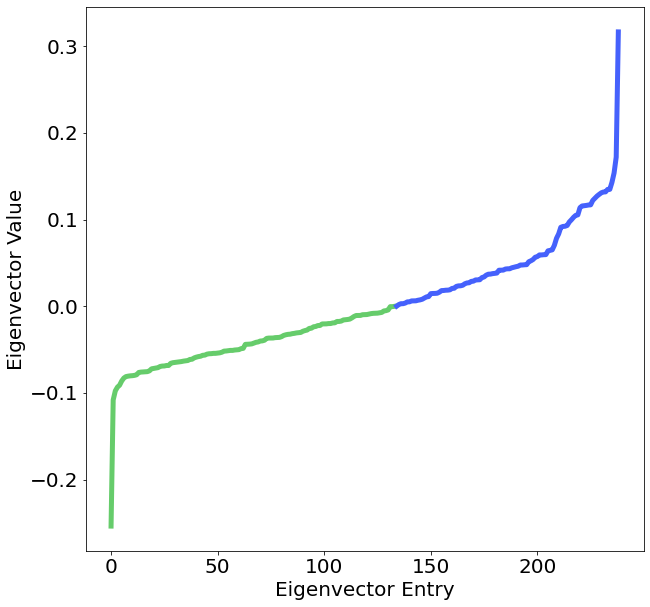

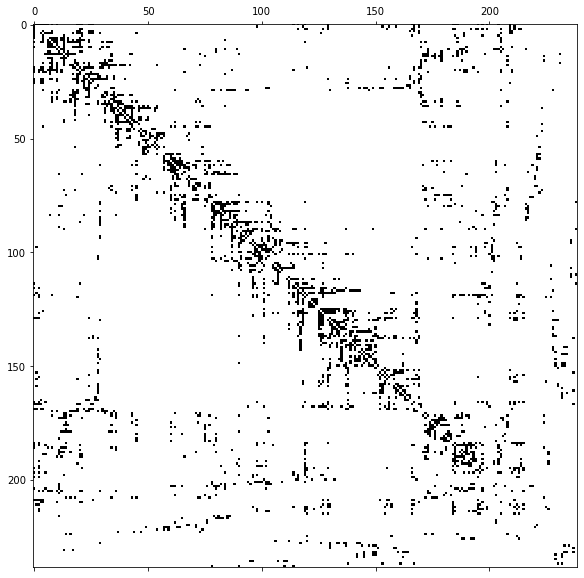

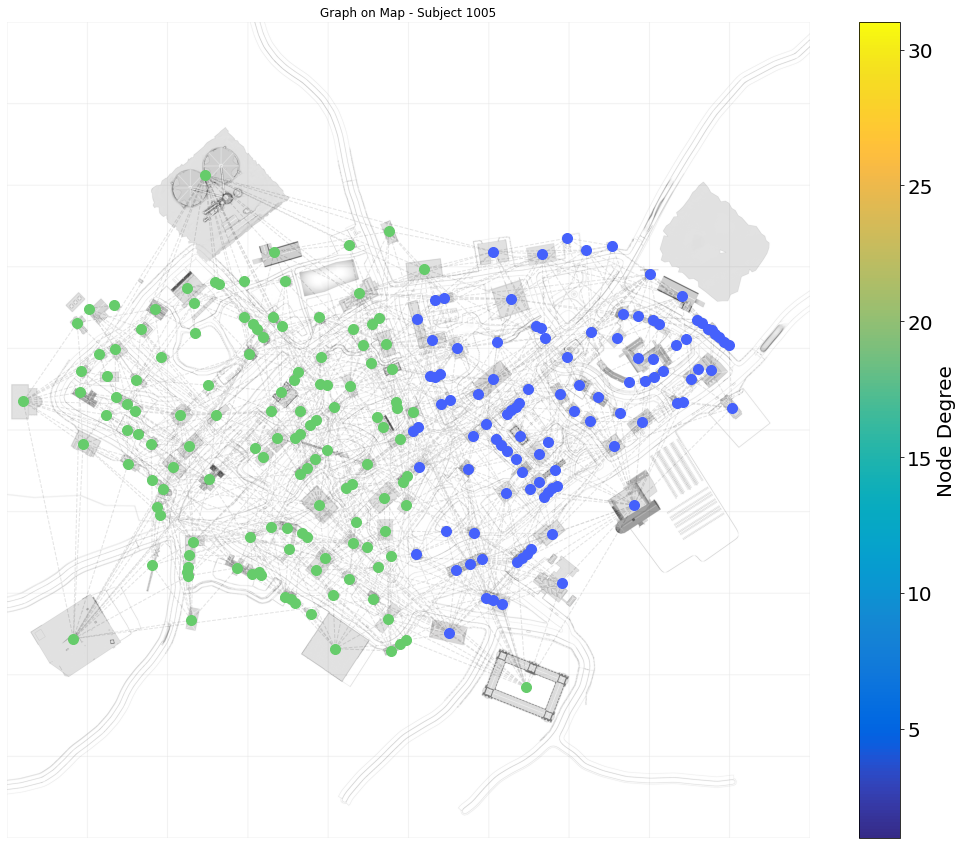

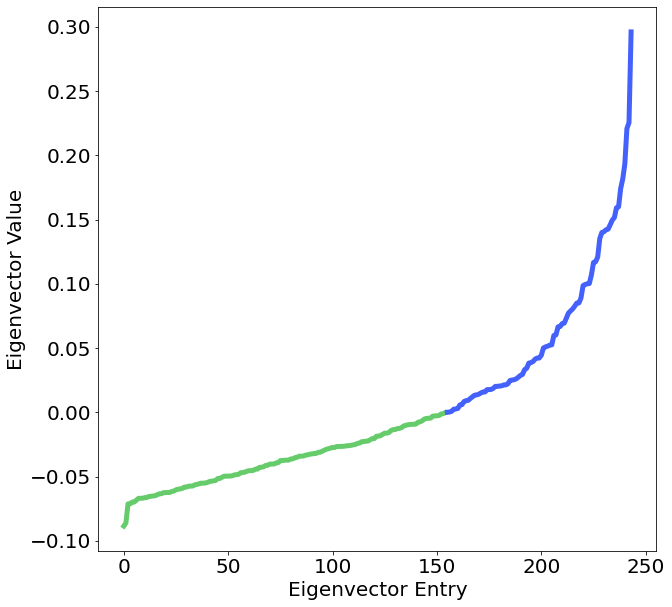

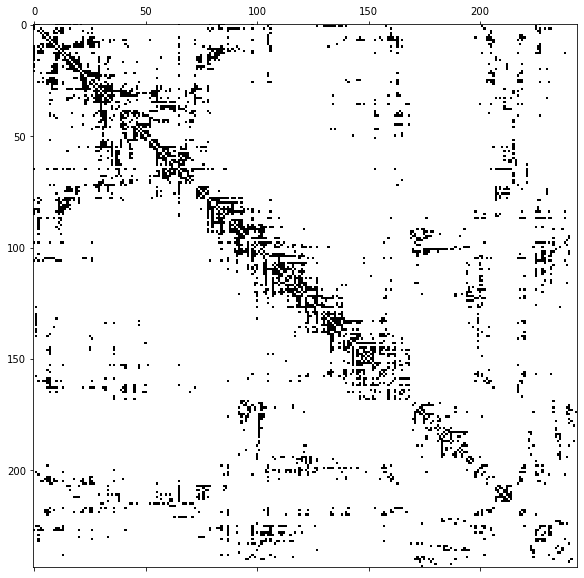

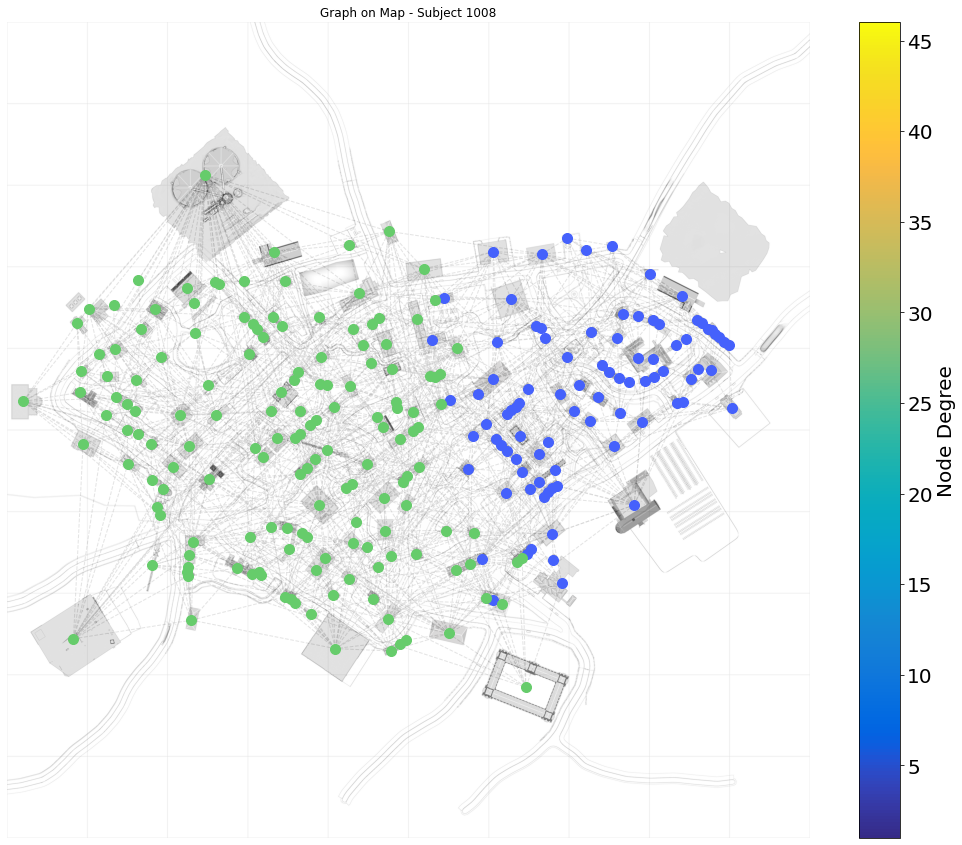

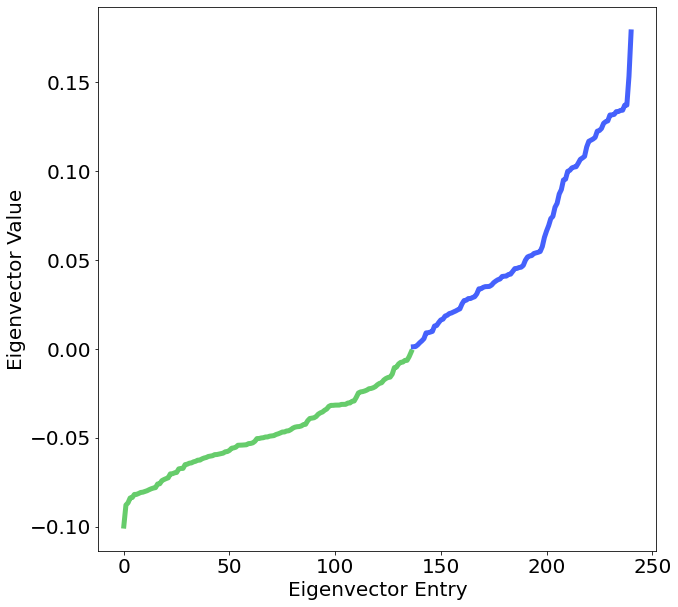

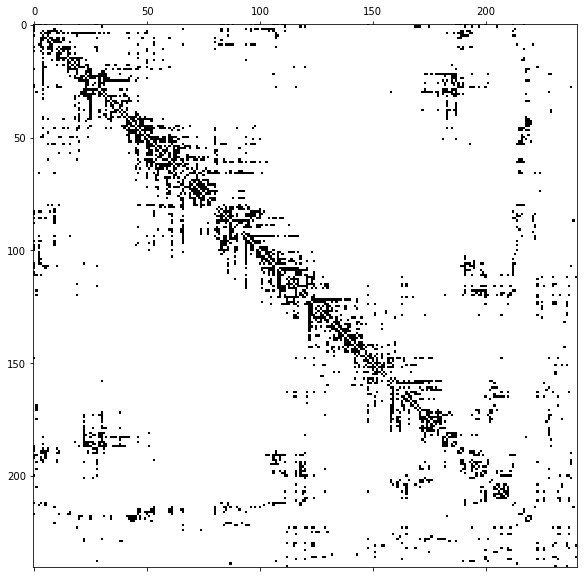

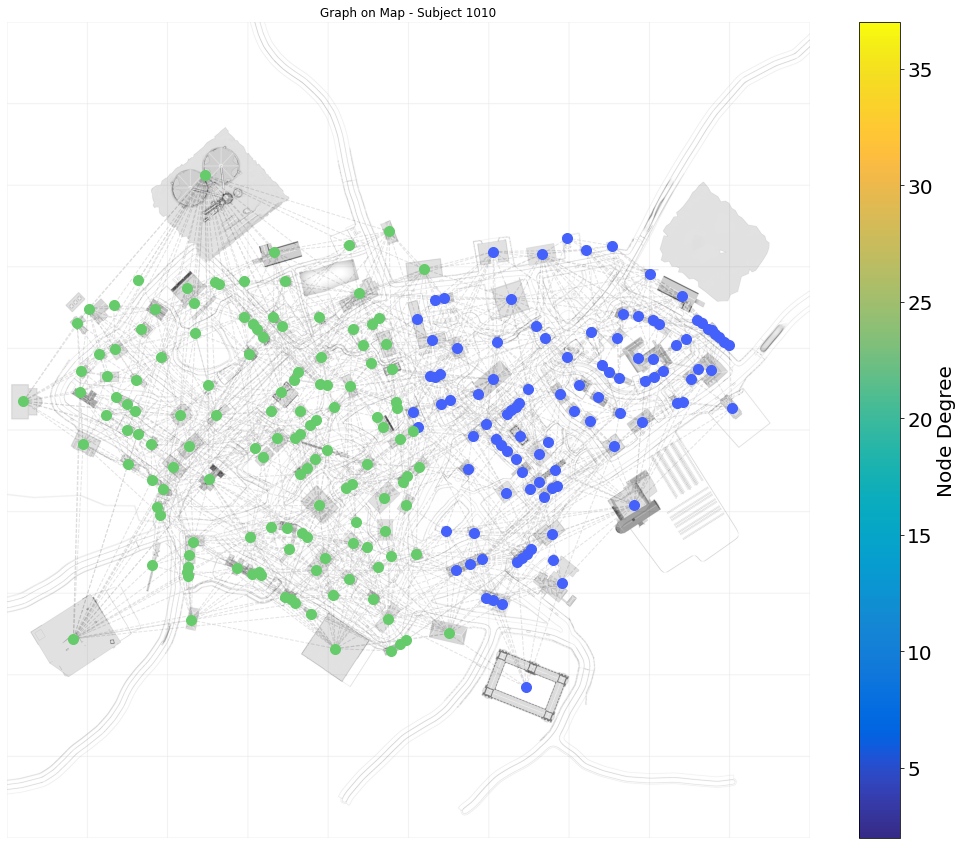

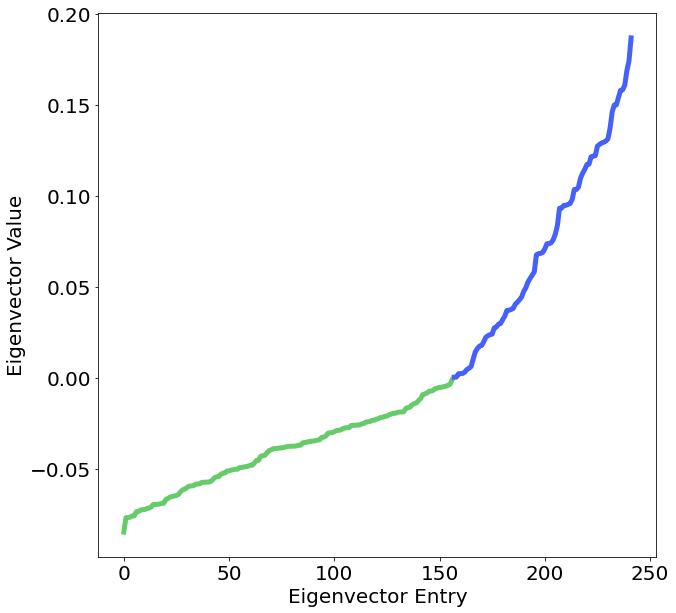

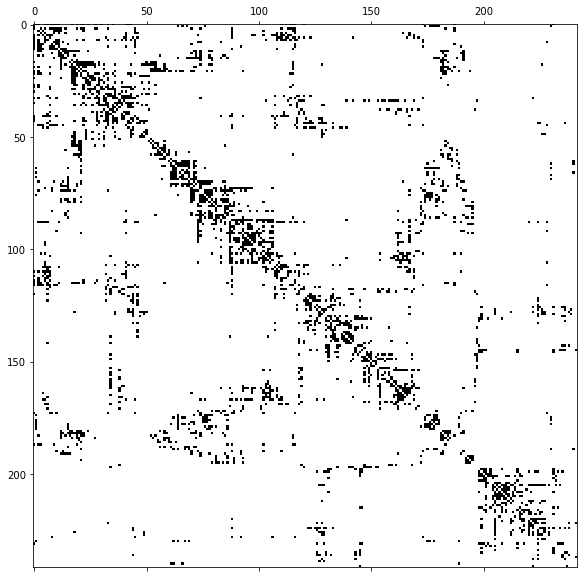

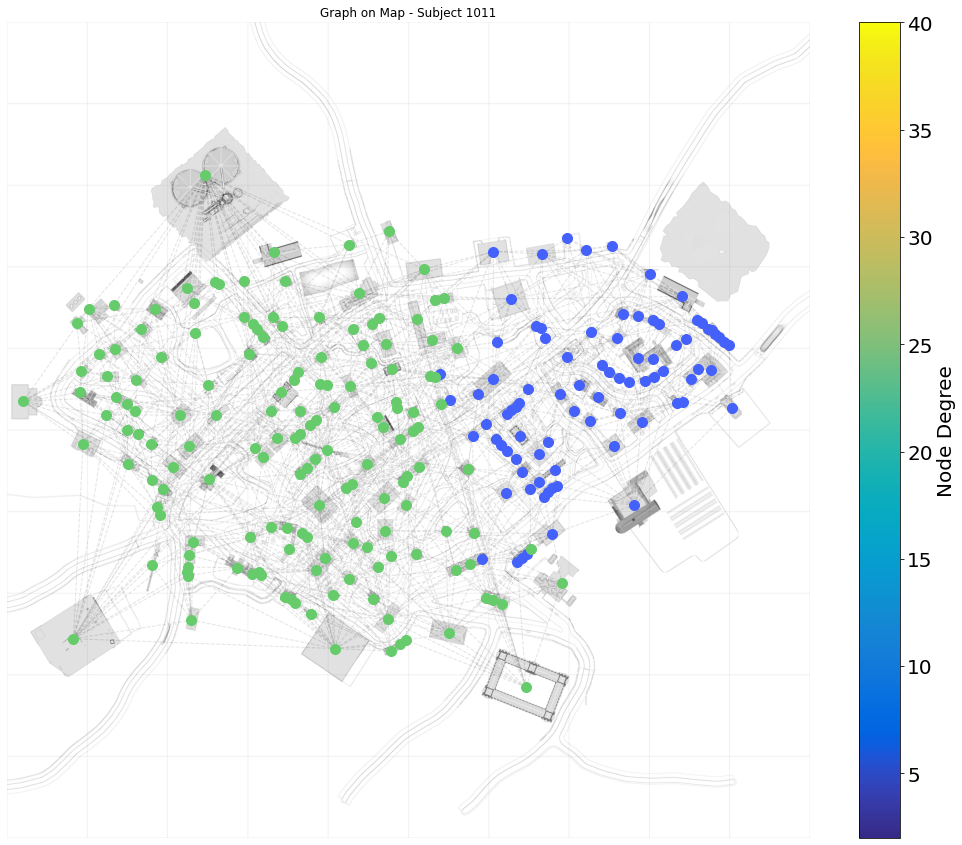

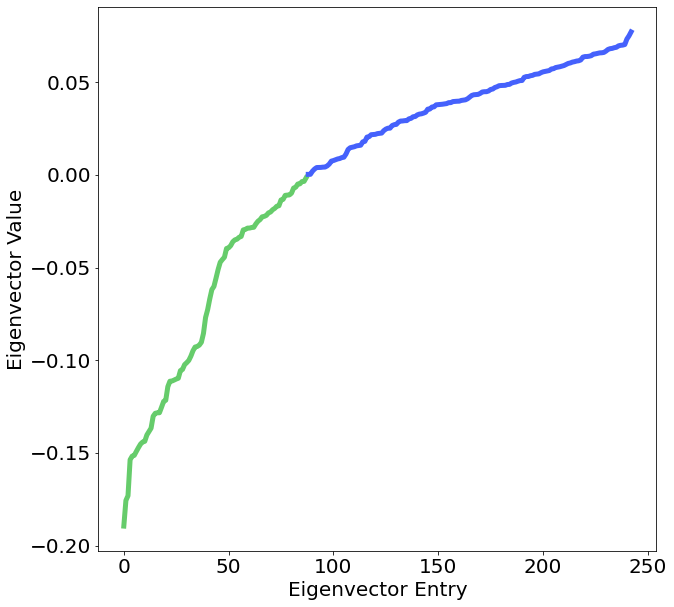

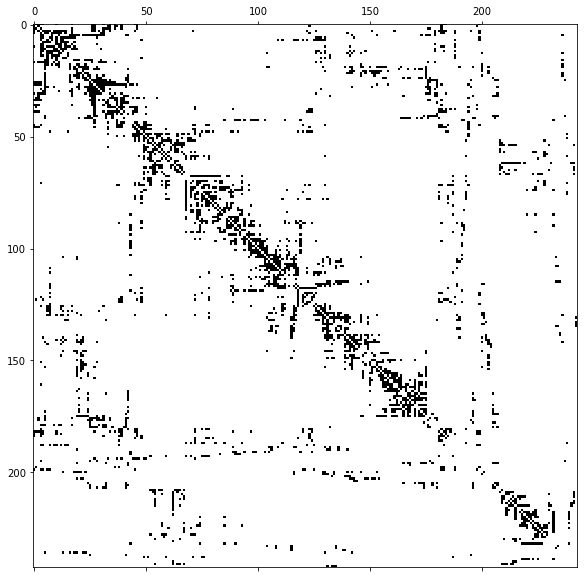

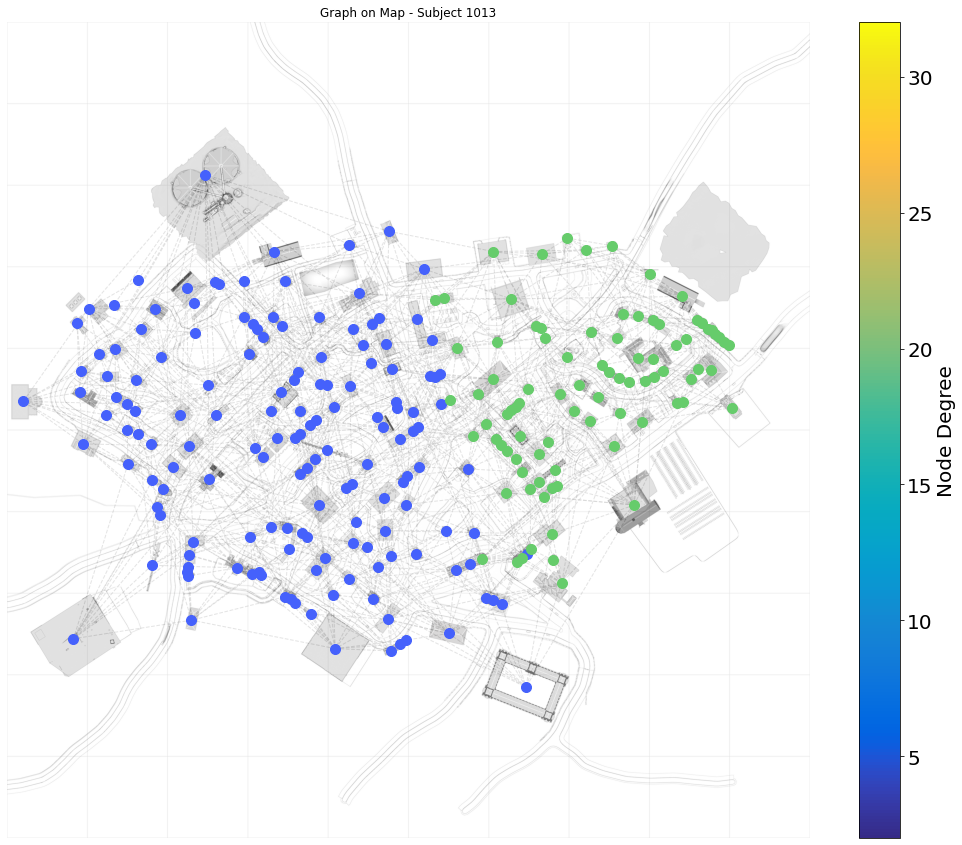

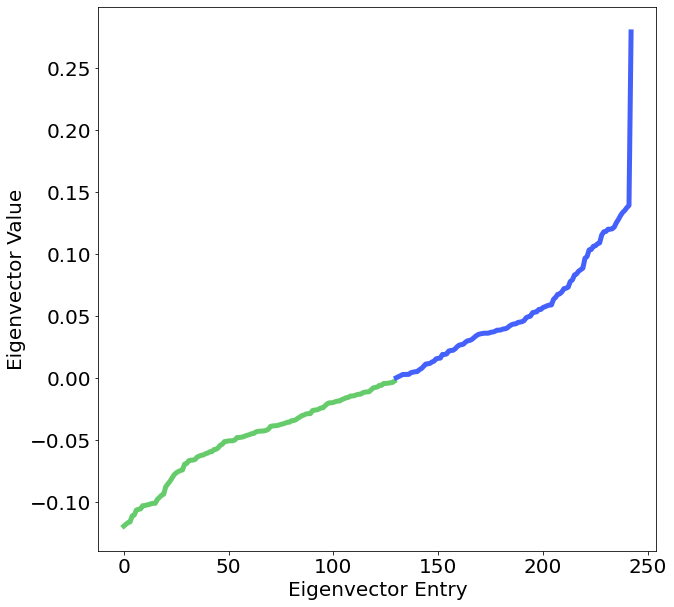

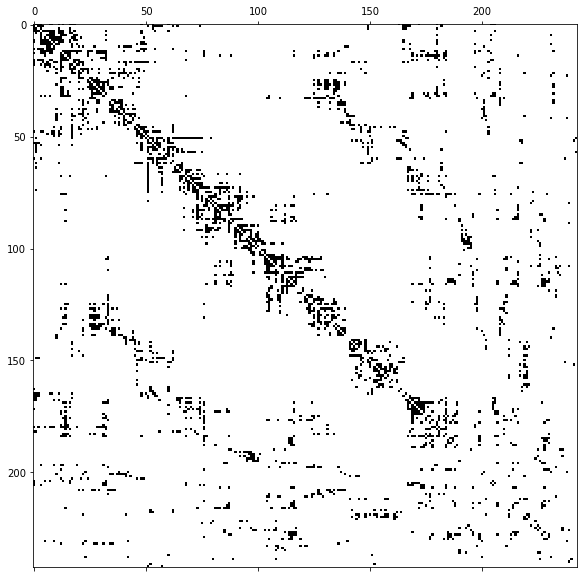

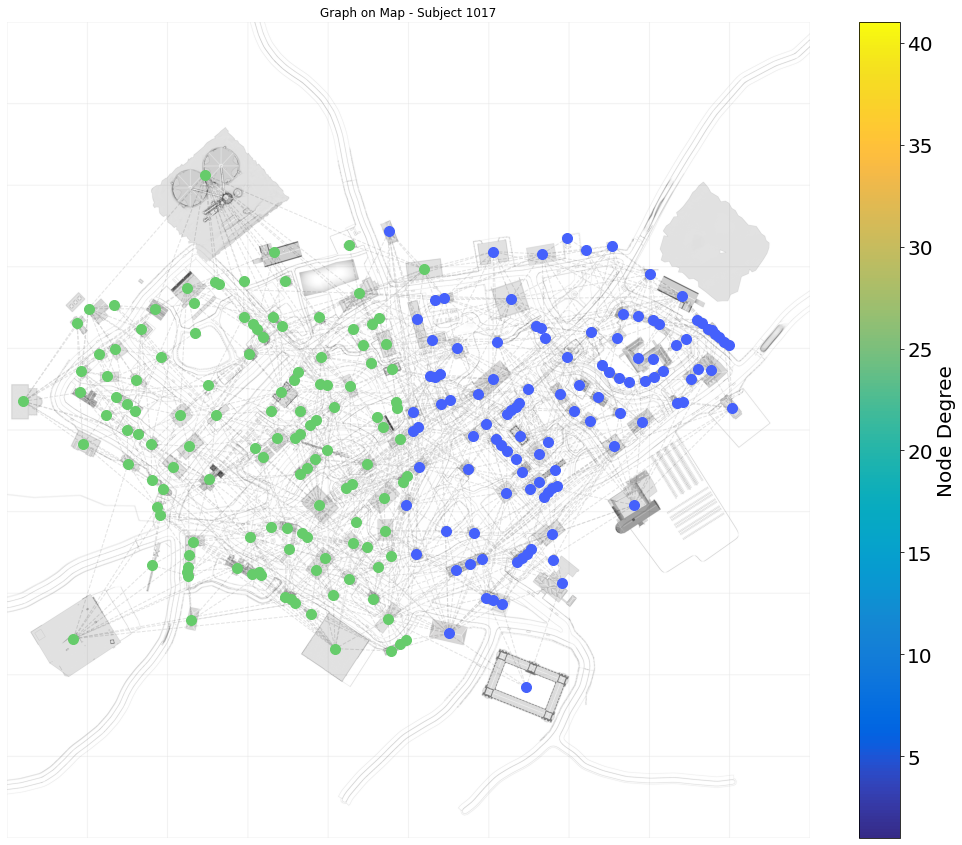

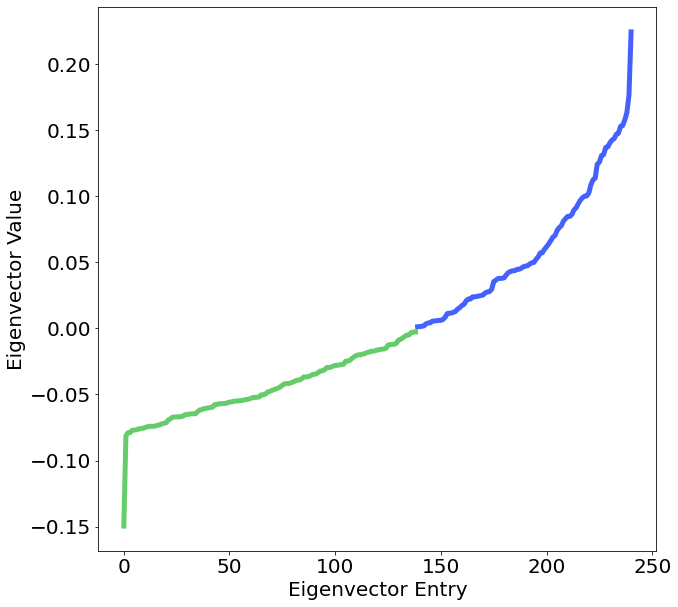

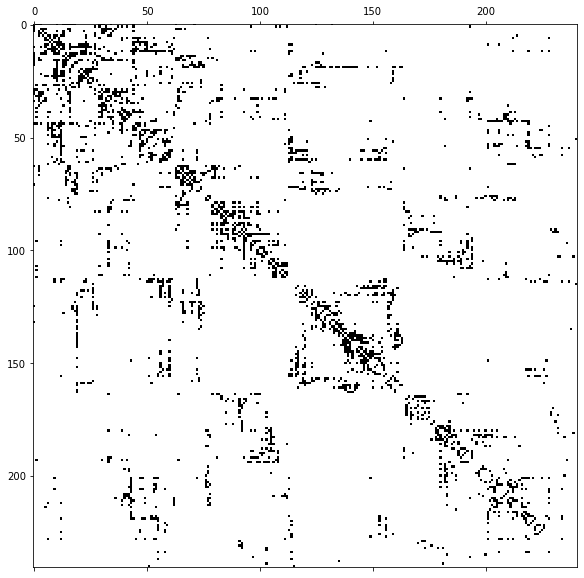

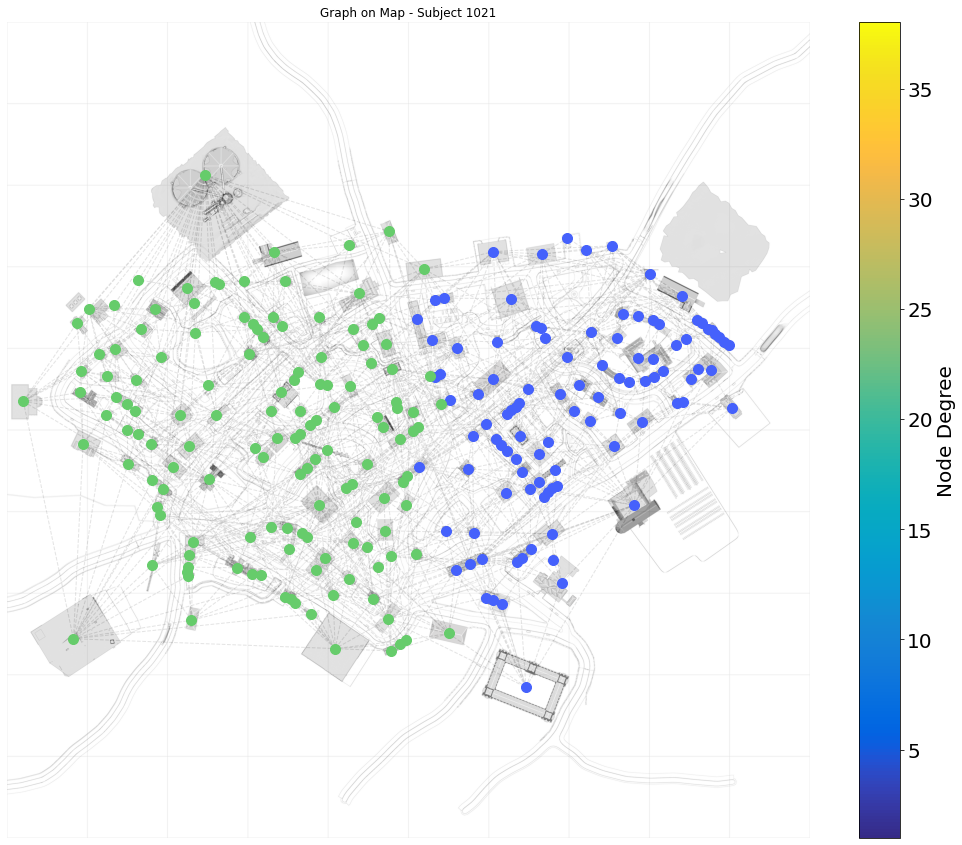

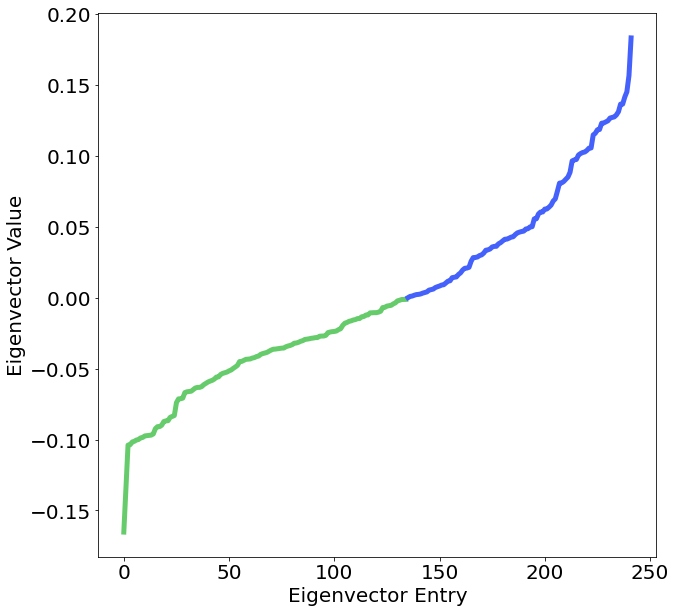

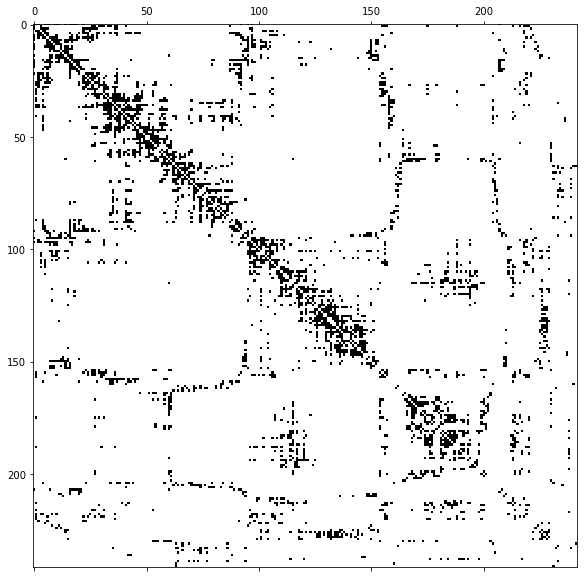

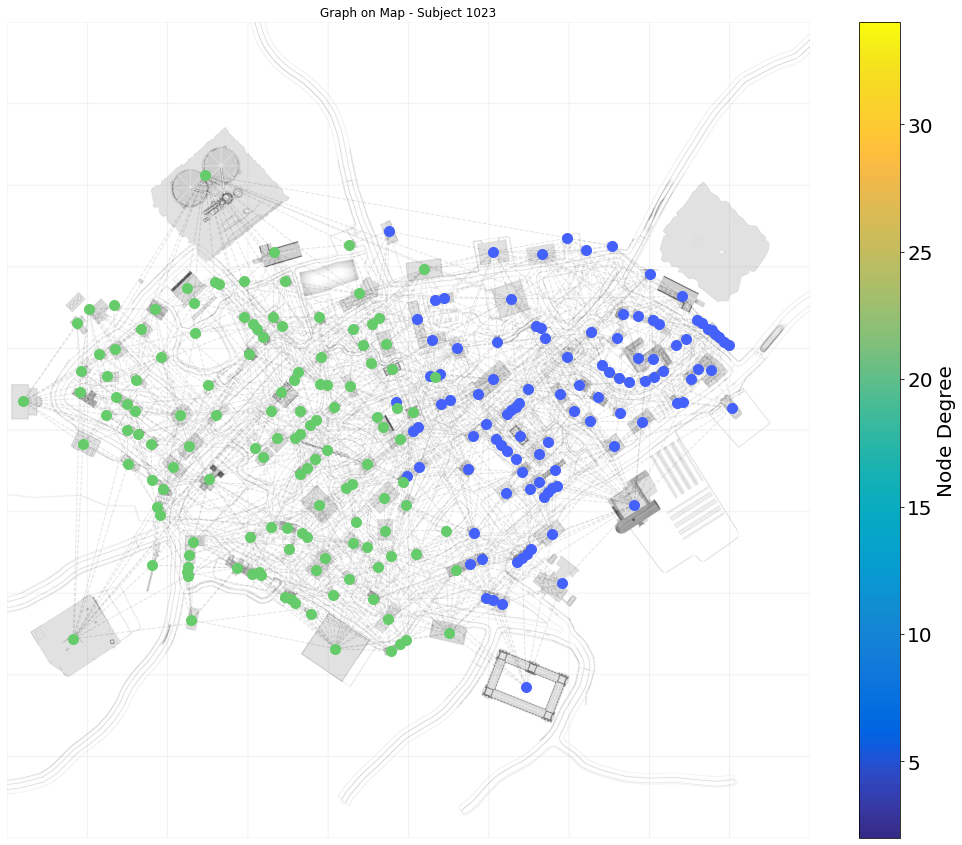

In [187]:
# --------- Preparation ---------
Plotting_bool = True # if you want to plot the graph
save_bool = True # if you want to save the respective figure
plot_edges_bool = True # if you want to plot the graph's edges
save_centrality = False # if you want to save the centrality dataframe (node degree) as csv 

calculate_Partitioning = True # if you want to calculate the graph partitioning
calculate_ND = False # if you want to calculate the node degree statistics
calculate_Hierarchy = False  # if you want to calculate the hierarchy index 
calculate_RC = False  # if you want to calculate the rich club coefficient
calculate_triang = False  # if you want to calculate the triangulation

subcount = 0 # count subjects

PartitioningDoc = pd.DataFrame()

# implement parula color map scheme from matlab 
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# load the city map image
white_bg_img = cv2.imread("./ressources/map_white.png")

# open the JSON file as dictionary
with open(GIT_GRAPH_PATH + 'centrality_df.csv') as f:
    try:
        centrality_df = pd.read_csv(f)
    except:
            print("\tCould not load centrality_df!")




# --------- MAIN PART ---------
# load the files 
for subject in subIDs:
    subcount +=1
    print('Subject ' + str(subject) + ' started - ' + str(subcount) + '/' + str(len(subIDs)))
    
    # get the data files according to the subject
    subject_folder = sorted([f for f in GIT_GRAPH_FOLDER 
                             if f.startswith(str(subject)+'_edgelist')], key=str.lower)

    if len(subject_folder) != 0:
        
        # open the JSON file as dictionary
        with open(GIT_GRAPH_PATH + subject_folder[0]) as f:
            try:
                edge_list = pd.read_csv(f)
            except:
                    print("\tCould not load subject " + str(subject) + " edgelist!")

    else:
        print('Subject ' + str(subject) + ' has no data file!')
        continue 



    # --------- GRAPH CREATION ---------

    # create graph from edgelist
    G = nx.Graph()
    G = nx.from_pandas_edgelist(edge_list, 'Edge1', 'Edge2')


    # Setting the node coordinates of each node of the graph


    # node list
    nodelist = list(G.nodes)
    nodearray = np.array(G.nodes)

    # coord dict
    node_pos = {}

    for node in nodelist:
        # assign node coordinates
        x = houselist['transformed_collidercenter_x'][houselist.target_collider_name==node].values[0]
        y = houselist['transformed_collidercenter_y'][houselist.target_collider_name==node].values[0]
        node_pos[node] = (x,y) 

    # set the graph's node coordinates attribute
    nx.set_node_attributes(G, node_pos, 'coord')

    # degree list of the graph
    degree_list = list(dict(G.degree).values())

    # --------- ANALYSIS ---------

    # --------- PARTITIONING ---------
    if calculate_Partitioning == True:     
        # ---- Step 1 ----
        
        # get laplacian matrix and its eigenvalues + eigenvectors
        laplacian_matrix = nx.laplacian_matrix(G)
        laplacian_matrix = sparse.csr_matrix.toarray(laplacian_matrix)
        # Eigenvalues and vectors
        Eigenvalue, Eigenvector = np.linalg.eig(laplacian_matrix)
        # sort Eigenvalues in ascending order and use index to sort eigenvectors
        index_array = np.argsort(Eigenvalue)
    
        # check if smallest eigenvalue is 0 (or close to 0)
        if Eigenvalue[index_array][0] < 1e-10:
            print('smallest Eigenvalue is 0')
            # check if second smallest eigenvalue is larger 0 (this means the graph is fully connected)
            if Eigenvalue[index_array][1] > 1e-10:
                print('Graph is fully connected')
                
                # create a dataframe and assign both the eigenvector sorted
                house_eig_df = pd.DataFrame()
                house_eig_df['House'] = nodearray
                house_eig_df['Eigenvector'] = Eigenvector[:,index_array[1]]
                
                
                eig_pos = house_eig_df[house_eig_df.Eigenvector >= 0]
                eig_neg = house_eig_df[house_eig_df.Eigenvector < 0]
                
                # create the subgraphs
                posG = G.subgraph(eig_pos.House)
                negG = G.subgraph(eig_neg.House)
                
                # Calculate number of edges and how many were cut
                totalEdges = G.number_of_edges()
                C1_Edges = posG.number_of_edges() 
                C2_Edges = negG.number_of_edges()
                combinedEdges = C1_Edges + C2_Edges
                Cut_Edges = totalEdges - combinedEdges
                # Calculate number of nodes
                total_nodes = G.number_of_nodes()
                C1_nodes = posG.number_of_nodes()
                C2_nodes = negG.number_of_nodes()
                # Calculate the density
                total_density = totalEdges/nchoosek(total_nodes,2)
                C1_density = C1_Edges/nchoosek(C1_nodes,2)
                C2_density = C2_Edges/nchoosek(C2_nodes,2)
                
                
                # Adding the values to the partitioning documentation dataframe
                partitioning_sub_df = pd.DataFrame()
                partitioning_sub_df.loc[0, 'Subject'] = subject
                partitioning_sub_df.loc[0, 'Eigenvalue'] = Eigenvalue[index_array][1]
                partitioning_sub_df.loc[0, 'Complete Edges'] = totalEdges
                partitioning_sub_df.loc[0, 'C1 Edges'] = C1_Edges
                partitioning_sub_df.loc[0, 'C2 Edges'] = C2_Edges
                partitioning_sub_df.loc[0, 'Cut Edges'] = Cut_Edges
                partitioning_sub_df.loc[0, 'Total Nodes'] = total_nodes
                partitioning_sub_df.loc[0, 'C1 Nodes'] = C1_nodes
                partitioning_sub_df.loc[0, 'C2 Nodes'] = C2_nodes
                partitioning_sub_df.loc[0, 'Complete Degree'] = (totalEdges*2)/total_nodes
                partitioning_sub_df.loc[0, 'C1 Degree'] = C1_Edges/C1_nodes*2
                partitioning_sub_df.loc[0, 'C2 Degree'] = C2_Edges/C2_nodes*2
                partitioning_sub_df.loc[0, 'Complete Density'] = total_density
                partitioning_sub_df.loc[0, 'C1 Density'] = C1_density
                partitioning_sub_df.loc[0, 'C2 Density'] = C2_density               

                
                PartitioningDoc = PartitioningDoc.append(partitioning_sub_df)
                
                
                
                # ------- PLOTTING ---------
                
                if Plotting_bool == True:

                    # Plotting the eigenvector 
                    
                    fig_eig = plt.figure(figsize=(10,10))
                    
                    plot_eig = house_eig_df.sort_values(by='Eigenvector').reset_index()
                    plot_eig_neg = plot_eig.Eigenvector[plot_eig.Eigenvector<0]
                    plot_eig_pos = plot_eig.Eigenvector[plot_eig.Eigenvector>=0]

                    plt.plot(plot_eig_neg, linewidth = 5, color =green)
                    plt.plot(plot_eig_pos, linewidth = 5, color =blue)

                    # settings
                    plt.xlabel('Eigenvector Entry', fontsize=fontsize)
                    plt.ylabel('Eigenvector Value', fontsize=fontsize)
                    plt.xticks(fontsize=fontsize)
                    plt.yticks(fontsize=fontsize)
                    
                    
                    # save the graph as png 
                    if save_bool == True:
                        # saving the subject info dataframe
                        try:
                            plt.savefig(GIT_GRAPH_PATH + str(subject) + "_Eigenvector.png",
                                        format="PNG",
                                        facecolor='white',
                                        transparent=False)

                            print("\tGraph PNG saved")
                        except:
                            print("\tCould not save subject " + str(subject) + " Eigenvector as PNG!")


                    # plotting the spy matrix 
                    # get the sorting pattern of the 2nd smallest eigenvector
                    sorted_adj = np.sort(Eigenvector[:,index_array[1]])
                    index = np.argsort(Eigenvector[:,index_array[1]])
                    # sort the adjacency matrix according to the eigenvector (currently not)
                    adj = sparse.csr_matrix.toarray(nx.adjacency_matrix(G))

                    fig_spy = plt.figure(figsize=(10,10))
                    #kwargs = {'color':green}
                    plt.spy(adj)#, **kwargs)
                    

                    
                    # Plotting the graph on the map 

                    # plot the map
                    fig = plt.figure(figsize=(20,15))
                    ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
                    plt.title("Graph on Map - Subject " + str(subject))
                    plt.xlim(0, 4096)
                    plt.ylim(0, 4096)
                    ax.set_frame_on(False)
                    plt.axis('off')
                    plt.imshow(white_bg_img,aspect=ax.get_aspect(),
                             extent= ax.get_xlim() + ax.get_ylim(),
                             zorder=1, alpha=0.8)

                    # Draw the graph 
                    vmin = np.min(degree_list)
                    vmax = np.max(degree_list)


                    # plotting the clusters
                    # positive cluster
                    nx.draw_networkx_nodes(posG, node_color = blue, pos=node_pos, node_size=100)
                    # negative cluster
                    nx.draw_networkx_nodes(negG, node_color = green, pos=node_pos, node_size=100)




                    if plot_edges_bool == True:
                        nx.draw_networkx_edges(G, 
                                               node_pos, 
                                               edge_color='k', 
                                               alpha=0.5, 
                                               width=1,
                                               style='dashed')


                    sm = plt.cm.ScalarMappable(cmap=parula_map, norm=plt.Normalize(vmin=vmin, vmax=vmax))
                    sm.set_array([])
                    cbar = plt.colorbar(sm)
                    cbar.ax.tick_params(labelsize=20)
                    cbar.set_label('Node Degree', size=20)
                    
                    
                    # save the graph as png 
                    if save_bool == True:
                        # saving the subject info dataframe
                        try:
                            plt.savefig(GIT_GRAPH_PATH + str(subject) + "_Cluster_Graph.png",
                                        format="PNG",
                                        facecolor='white',
                                        transparent=False)

                            print("\tGraph PNG saved")
                        except:
                            print("\tCould not save subject " + str(subject) + " Graph as PNG!")

                    else:
                        save_bool = False

          
            else:
                print('Graph is not fully connected')
    
    
    # --------- NODE DEGREE ---------
    if calculate_ND == True: 
    
        # create degree list of the graph 
        sub_degree = dict(G.degree)


        mean_degree = np.nanmean(degree_list)
        std_degree = np.nanstd(degree_list)
        max_degree = max(degree_list)


        # add the subject ID to the dictionary
        sub_degree.update({'Subject': str(subject)})  
        # append the centrality df by the subjects degree list
        centrality_df = centrality_df.append(sub_degree, ignore_index=True)


    
    # --------- HIERARCHY INDEX ---------
    if calculate_Hierarchy == True: 
        pass
    
    
    # --------- RICH CLUB COEFFICIENT ---------
    if calculate_RC == True:     
        pass
    
    
    # --------- TRIANGULATION ---------
    if calculate_triang == True: 
        pass
    
    

    
    # --------- PLOTTING ---------    

    

    # --------- SAVING ---------



            
            
# --------- SUBJECT INDEPENDENT SAVINGS ---------   
            
# Add the mean over both axes to the centrality df and save it 


house_mean_dict = dict(centrality_df.loc[:,centrality_df.columns[1:]].mean(axis=0))
house_mean_dict.update({'Subject': 'Mean'})  
                 
house_std_dict = dict(centrality_df.loc[:,centrality_df.columns[1:]].std(axis=0))
house_std_dict.update({'Subject': 'STD'})  
                
centrality_df = centrality_df.append(house_mean_dict, ignore_index=True)
centrality_df = centrality_df.append(house_std_dict, ignore_index=True)

subject_mean = centrality_df.loc[:,centrality_df.columns[1:]].mean(axis=1)
subject_std = centrality_df.loc[:,centrality_df.columns[1:]].std(axis=1)
                 
centrality_df['Mean'] = subject_mean
centrality_df['STD'] = subject_std
    


if save_centrality == True: 
    # saving the subject info dataframe
    try:
        centrality_df.to_csv(GIT_GRAPH_PATH
                        + "_degree_table.csv", 
                        index=False)

        print("\tCentrality Dataframe saved")
    except:
        print("\tCould not save centrality dataframe!")



    
print('Done')
    

In [32]:
centrality_df

Subject  Building_100  Building_101  Building_102  Building_103  \
0     1005     16.000000     21.000000     14.000000     11.000000   
1     1008     18.000000     27.000000     23.000000     11.000000   
2     1010     14.000000     22.000000     15.000000     15.000000   
3     1011     16.000000     21.000000     15.000000     10.000000   
4     1013     15.000000     20.000000     15.000000     11.000000   
5     1017     14.000000     18.000000     13.000000     13.000000   
6     1021     16.000000     20.000000     14.000000      7.000000   
7     1023     20.000000     21.000000     21.000000     12.000000   
8     Mean     16.125000     21.250000     16.250000     11.250000   
9      STD      2.031010      2.604940      3.654743      2.314550   
10    Mean     14.715601     19.385494     14.990474     10.356455   
11     STD      4.803373      6.327843      5.123762      3.485813   

    Building_104  Building_105  Building_106  Building_107  Building_108  ...  \
0      21.000000      6.000000      4.000000     15.000000     17.000000  ...   
1      26.000000     12.000000     14.000000     16.000000     21.000000  ...   
2      19.000000      9.000000      6.000000     10.000000     20.000000  ...   
3      17.000000      6.000000     12.000000     11.000000     18.000000  ...   
4      15.000000      6.000000     11.000000     10.000000     16.000000  ...   
5      22.000000     10.000000     10.000000     14.000000     14.000000  ...   
6      22.000000     10.000000      2.000000     10.000000     12.000000  ...   
7      27.000000     15.000000      8.000000     19.000000     19.000000  ...   
8      21.125000      9.250000      8.375000     13.125000     17.125000  ...   
9       4.120940      3.240370      4.138236      3.399054      3.044316  ...   
10     19.424594      8.649037      7.951324     12.152405     15.716932  ...   
11      6.490157      3.431943      3.887732      4.294824      5.199510  ...   

    TaskBuilding_55  TaskBuilding_6  TaskBuilding_7  TaskBuilding_8  \
0         12.000000       16.000000        3.000000       11.000000   
1         16.000000       18.000000       12.000000       10.000000   
2         13.000000       20.000000        9.000000       12.000000   
3         10.000000       18.000000       10.000000       11.000000   
4          9.000000       22.000000       10.000000        9.000000   
5         12.000000       19.000000       10.000000        7.000000   
6         11.000000       18.000000        4.000000        3.000000   
7         16.000000       23.000000       16.000000       10.000000   
8         12.375000       19.250000        9.250000        9.125000   
9          2.559994        2.314550        4.166190        2.900123   
10        11.393499       17.556455        8.741619        8.502512   
11         3.838054        5.731284        4.010550        3.227472   

    TaskBuilding_9  Windmill-TaskBuilding_10_1    crane_1    crane_2  \
0        12.000000                   19.000000  14.000000   7.000000   
1        11.000000                   13.000000  28.000000  11.000000   
2        12.000000                   17.000000  15.000000   8.000000   
3        11.000000                   11.000000  18.000000   3.000000   
4        15.000000                   13.000000  18.000000  10.000000   
5        16.000000                   14.000000  18.000000   4.000000   
6         8.000000                   20.000000  22.000000  10.000000   
7        20.000000                   21.000000  23.000000   6.000000   
8        13.125000                   16.000000  19.500000   7.375000   
9         3.720119                    3.741657   4.598136   2.924649   
10       12.184512                   14.774166  18.009814   6.929965   
11        4.428213                    5.090735   6.216993   2.938255   

         Mean       STD  
0   11.983625  6.032341  
1   15.500158  7.492828  
2   13.828398  6.432739  
3   13.054835  6.286115  
4   12.990539  5.657880  
5   12.460599  6.3472

In [34]:
PartitioningDoc

Subject  Eigenvalue  Complete Edges  C1 Edges  C2 Edges  Cut Edges  \
0   1005.0    0.573876          1476.0     532.0     799.0      145.0   
0   1008.0    0.650093          1925.0     527.0    1225.0      173.0   
0   1010.0    0.568722          1718.0     599.0     991.0      128.0   
0   1011.0    0.477883          1622.0     396.0    1114.0      112.0   
0   1013.0    0.414325          1607.0    1036.0     460.0      111.0   
0   1017.0    0.515375          1555.0     645.0     761.0      149.0   
0   1021.0    0.493567          1479.0     470.0     881.0      128.0   
0   1023.0    0.772029          1894.0     714.0     981.0      199.0   

   Total Nodes  C1 Nodes  C2 Nodes  Complete Degree  C1 Degree  C2 Degree  \
0        239.0     105.0     134.0        12.351464  10.133333  11.925373   
0        244.0      89.0     155.0        15.778689  11.842697  15.806452   
0        241.0     104.0     137.0        14.257261  11.519231  14.467153   
0        242.0      85.0     157.0        13.404959   9.317647  14.191083   
0        243.0     155.0      88.0        13.226337  13.367742  10.454545   
0        243.0     113.0     130.0        12.798354  11.415929  11.707692   
0        241.0     102.0     139.0        12.273859   9.215686  12.676259   
0        242.0     107.0     135.0        15.652893  13.345794  14.533333   

   Complete Density  C1 Density  C2 Density  
0          0.051897    0.097436    0.089664  
0          0.064933    0.134576    0.102639  
0          0.059405    0.111837    0.106376  
0          0.055622    0.110924    0.090968  
0          0.054654    0.086804    0.120167  
0          0.052886    0.101928    0.090757  
0          0.051141    0.091244    0.091857  
0          0.064950    0.125904    0.108458